2번째 과제는 직접 기초 문법들을 코딩해보는 것입니다.
해당 페이지에서 코딩하지 마시고 아예 빈 페이지에서부터 시작해주세요~

##학습할 내용은 이렇습니다:

1. python 기초 문법
2. pandas
3. requests data crawling
4. matplotlib 으로 데이터 시각화

##1. python 기초 문법

해당 링크 들어가서 쓱 훑어보고, 만약 모르는 내용이 있으면 직접 코딩해보기:

https://software-creator.tistory.com/18

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

## 2. pandas

DataFrame이라는 2차원 형태의 데이터를 다루기 위한 라이브러리

#### 1) DataFrame의 생성

In [40]:
#값들은 다 NaN 값 상태
df = pd.DataFrame(index=range(0,77), columns=["A","B","C","D"])

#파이썬 딕셔너리로부터 생성
items = {'code' : [1,2,3,4],
         '계정과목': ['매출채권', '매출원가', '현금',  '자본'],
         '금액':[1500, 15000,1000,500],
         '재무제표': ['재무상태표','손익계산서','현금흐름표', '자본변동표']}
df1 = pd.DataFrame(items)



In [41]:
df # 모든 값이 NAN

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
72,NaN,NaN,NaN,NaN
73,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN


In [42]:
df1

,code,계정과목,금액,재무제표
0,1,매출채권,1500,재무상태표
1,2,매출원가,15000,손익계산서
2,3,현금,1000,현금흐름표
3,4,자본,500,자본변동표


#### 2) DataFrame에 값을 할당하는 방법

apply(func,axis)를 이용하는 방법

apply 함수는 DataFrame의 값들을 함수를 이용해서 조작한 값(평균 등등) 을 얻고 싶을 때 사용 <br>
axis = 0 은 열에 따라 조작하는 것 <br>
axis = 1 은 행에 따라 조작하는 것 

In [43]:
#axis에 따른 차이

cols = {"국어":[70,80,90],"수학":[70,80,90]}
indexes = ["홍길동","전우치","임꺽정"]
df2 = pd.DataFrame(cols,indexes)
df2

,국어,수학
홍길동,70,70
전우치,80,80
임꺽정,90,90


In [44]:
#axis = 0 : 열 기준으로 집계 (행은 사라짐) -> 과목별 정보
df2.apply(np.mean, axis = 0)

국어    80.0
수학    80.0
dtype: float64

In [45]:
#axis = 1 : 행 기준으로 집계 (열은 사라짐)  -> 학생들 정보
df2.apply(np.mean, axis = 1)

홍길동    70.0
전우치    80.0
임꺽정    90.0
dtype: float64

이제 이 apply 함수를 DataFrame의 값을 부여하는데 사용 <br>


property Series.name[source] <br>
Return the name of the Series. <br>

The name of a Series becomes its index or column name if it is used to form a DataFrame. It is also used whenever displaying the <br> Series using the interpreter. <br>

Returns <br>
label (hashable object) <br>
The name of the Series, also the column name if part of a DataFrame. <br>

In [46]:
df.apply(lambda b: str(b.name),axis=1) # 행의 이름을 기준으로 이름을 따라하는 데이터 생성

0      0
1      1
2      2
3      3
4      4
      ..
72    72
73    73
74    74
75    75
76    76
Length: 77, dtype: object

In [47]:
#일괄적으로 값을 부여하고 싶을때! 
df = df.apply(lambda x: df.apply(lambda b: str(b.name),axis=1),axis=0)  #위의 결과를 모든 열을 기준으로 생성후 원래 DataFrame에 할당

# axis : 0일때 행, 1일때 열에 적용시킨다.
#https://hogni.tistory.com/49
# b.name : 

axis = 1을 통해서 열의 이름을 그 열의 모든 element에 넣어주었다 <br>
그리고 그것을 모든 행에 적용시켜주었다. <br>
다시 그 값을 DataFrame에 할당해준다.

In [48]:
df

,A,B,C,D
0,0,0,0,0
1,1,1,1,1
2,2,2,2,2
3,3,3,3,3
4,4,4,4,4
...,...,...,...,...
72,72,72,72,72
73,73,73,73,73
74,74,74,74,74
75,75,75,75,75


참고로 람다함수가 뭔지 잘 모르는 분들을 위해 사진 첨부하겠습니다ㅎㅎ

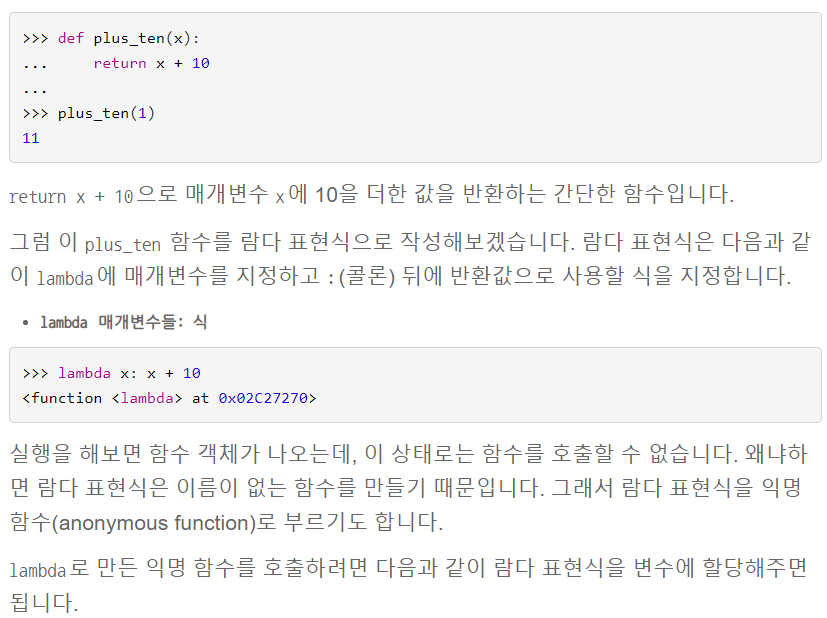

In [49]:
# loc & iloc 잘 구별하기!

# 1. A컬럼의 0번 index에 위치한 값을 선택하시오
df["A"].loc[0]

df["A"].iloc[0]

# 2. A컬럼의 0~10번 index에 속한 값들을 선택하시오
df["A"].loc[0:10]
df["A"].iloc[0:10]

# 3. A컬럼부터 C컬럼까지만 선택하시오
df.loc[:,"A":"C"]
df.iloc[:,0:3] #숫자값으로 접근(칼럼도)

,A,B,C
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4
...,...,...,...
72,72,72,72
73,73,73,73
74,74,74,74
75,75,75,75


In [50]:
import random
random.seed(100)


num_df = df.apply(lambda x: df.apply(lambda x: random.randint(0,101),axis=1)) #axis = 0이 default 값이기 때문에 바깥쪽에서는 생략해줌
num_df

,A,B,C,D
0,18,67,20,98
1,58,87,6,23
2,58,43,60,10
3,98,69,96,2
4,22,46,6,88
...,...,...,...,...
72,91,61,41,72
73,37,69,86,18
74,88,4,56,17
75,75,89,4,97


#### 3) 칼럼간 연산

In [51]:
# num_df의 A 와 B값을 합친 D 컬럼을 만드시오.

num_df["D"] = num_df["A"] + num_df["B"]
num_df

,A,B,C,D
0,18,67,20,85
1,58,87,6,145
2,58,43,60,101
3,98,69,96,167
4,22,46,6,68
...,...,...,...,...
72,91,61,41,152
73,37,69,86,106
74,88,4,56,92
75,75,89,4,164


In [52]:
# num_df의 A~D 까지의 sum인 sum 컬럼을 만드시오
num_df["E"] = num_df.sum(axis=1) #열을 축으로하는 덧셈
num_df

,A,B,C,D,E
0,18,67,20,85,190
1,58,87,6,145,296
2,58,43,60,101,262
3,98,69,96,167,430
4,22,46,6,68,142
...,...,...,...,...,...
72,91,61,41,152,345
73,37,69,86,106,298
74,88,4,56,92,240
75,75,89,4,164,332


4) 상관계수 <br>

상관 계수는 두 변수 사이의 선형관계성의 정도를 나타내는 값이다 <br>
-1 ~ 1 의 값을 가지며, -1은 반비례, 1은 비례, 0은 아무 관련이 없음을 나타낸다. <br>
https://www.jmp.com/ko_kr/statistics-knowledge-portal/what-is-correlation/correlation-coefficient.html

In [53]:

# 각 컬럼 값들의 상관계수를 구하시오
covAB = sum(
    (num_df["A"] - num_df["A"].mean()
    ) 
    * (num_df["B"] - num_df["B"].mean()
      )
)/len(num_df)  #곱의 합 


standard_D_A = (
    sum(
        (num_df["A"] - num_df["A"].mean())**2)
    /len(num_df))**(1/2)

standard_D_B = (
    sum(
        (num_df["B"] - num_df["B"].mean())**2)
    /len(num_df))**(1/2)


corrAB = covAB / (standard_D_A * standard_D_B)

corrAB




#num_df.corr()

0.13269879038077087

## 2. python - apply lambda

In [54]:
df = pd.DataFrame(index=range(0,77), columns=["A","B","C","D"])

for col in df.columns:                           #for문으로 하나씩 접근해주면서 값을 할당
    for ind in df.index:
        df[col].loc[ind] = str(ind) + col.lower() 
        
df

,A,B,C,D
0,0a,0b,0c,0d
1,1a,1b,1c,1d
2,2a,2b,2c,2d
3,3a,3b,3c,3d
4,4a,4b,4c,4d
...,...,...,...,...
72,72a,72b,72c,72d
73,73a,73b,73c,73d
74,74a,74b,74c,74d
75,75a,75b,75c,75d


In [55]:
df = pd.DataFrame(index=range(0,77), columns=["A","B","C","D"])
df = df.apply(lambda x: df.apply(lambda x: str(x.name),axis=1)+ x.name.lower()) #위의 for문과 동일한 결과
df

,A,B,C,D
0,0a,0b,0c,0d
1,1a,1b,1c,1d
2,2a,2b,2c,2d
3,3a,3b,3c,3d
4,4a,4b,4c,4d
...,...,...,...,...
72,72a,72b,72c,72d
73,73a,73b,73c,73d
74,74a,74b,74c,74d
75,75a,75b,75c,75d


In [56]:
# apply 기능
# why?

from time import time
df = pd.DataFrame(index=range(0,77), columns=["A","B","C","D"])

pos1 = time()
for i in range(0,100):
    for col in df.columns:
        for ind in df.index:
            df[col].loc[ind] = str(ind) + col.lower()
    
print(time()-pos1)

pos1 = time()
for i in range(0,100):
    df.apply(lambda x: df.apply(lambda x: str(x.name),axis=1)+ x.name.lower()) #apply함수의 경우가 훨씬 빠르게 동작
    
print(time()-pos1)

2.425551414489746
0.2897770404815674


In [57]:
df.apply(lambda x: random.randint(0,101),axis=1) # 1 = 가로방향, 0 = 세로방향

0     74
1     18
2     21
3     45
4     94
      ..
72    89
73    56
74    79
75    24
76    41
Length: 77, dtype: int64

In [58]:
df.apply(lambda x: df.apply(lambda x: random.randint(0,101),axis=1),axis=0)

,A,B,C,D
0,11,51,0,82
1,20,2,34,36
2,43,59,10,49
3,76,43,68,1
4,98,5,92,3
...,...,...,...,...
72,27,39,67,0
73,99,29,16,37
74,84,51,60,69
75,66,55,18,4


# 3. request + beautifulsoup 이용해서 네이버 주가 가져오기

크롤링 할 페이지: 

https://finance.naver.com/item/sise_day.nhn?code=035420&page=1

In [59]:
from bs4 import BeautifulSoup as bs

#### Beautifulsoup <br>
뷰티풀 수프는 HTML과 XML 문서들의 구문을 분석하기 위한 파이썬 패키지이다. <br>
HTML로부터 데이터를 추출하기 위해 사용할 수 있는  <br>
파싱된 페이지의 파스 트리를 만드는데, 이는 웹 스크래핑에 유용하다. <br>

#### Request
Python 프로그래밍 언어용 HTTP 라이브러리입니다. <br>
프로젝트의 목표는 HTTP 요청을 더 간단하고 인간 친화적으로 만드는 것입니다. <br>
현재 버전은 2.28.0입니다. 요청은 Apache License 2.0에 따라 릴리스됩니다 <br>

In [60]:
code = '035420'  # NAVER

In [61]:
import requests
url = 'https://finance.naver.com/item/sise_day.nhn?code=035420&page=1'
agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
response = requests.get(url = url, headers = {'User-Agent': agent})
_soap = BeautifulSoup(response.text, 'lxml')
response.status_code #200이 호출되면 정상적인 url 사이트

200

In [62]:
import traceback
import pandas as pd

#함수로 만들어본다
def parse_page(code, page):
    try:
        url = 'https://finance.naver.com/item/sise_day.nhn?code={code}&page={page}'.format(code=code, page=page)
        agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
        response = requests.get(url = url, headers = {'User-Agent': agent})
        _soap = BeautifulSoup(response.text, 'lxml')
        
        _df = pd.read_html(str(_soap.find("table")), header=0)[0]
        _df = _df.dropna()
        return _df
    except:
        print('Error!')
    return None


In [63]:
data = parse_page(code,1)
data = data.sort_values('날짜')

In [64]:
data

,날짜,종가,전일비,시가,고가,저가,거래량
13,2023.01.11,195000.0,2000.0,197500.0,200500.0,194500.0,1030650.0
12,2023.01.12,194000.0,1000.0,198000.0,199000.0,194000.0,797343.0
11,2023.01.13,195000.0,1000.0,196000.0,200500.0,195000.0,869459.0
10,2023.01.16,200500.0,5500.0,197000.0,201000.0,195000.0,846276.0
9,2023.01.17,193500.0,7000.0,201000.0,201000.0,193500.0,976576.0
5,2023.01.18,195500.0,2000.0,194000.0,196000.0,193000.0,518929.0
4,2023.01.19,196000.0,500.0,194000.0,196500.0,192500.0,475600.0
3,2023.01.20,196000.0,0.0,195500.0,201000.0,195000.0,787881.0
2,2023.01.25,202000.0,6000.0,200500.0,203500.0,199600.0,988822.0
1,2023.01.26,204000.0,2000.0,202500.0,204000.0,199900.0,869944.0


In [65]:
data.set_index(data['날짜'],inplace=True,drop=True)
data.drop(['날짜'],inplace=True,axis=1)
data

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2023.01.11,195000.0,2000.0,197500.0,200500.0,194500.0,1030650.0
2023.01.12,194000.0,1000.0,198000.0,199000.0,194000.0,797343.0
2023.01.13,195000.0,1000.0,196000.0,200500.0,195000.0,869459.0
2023.01.16,200500.0,5500.0,197000.0,201000.0,195000.0,846276.0
2023.01.17,193500.0,7000.0,201000.0,201000.0,193500.0,976576.0
2023.01.18,195500.0,2000.0,194000.0,196000.0,193000.0,518929.0
2023.01.19,196000.0,500.0,194000.0,196500.0,192500.0,475600.0
2023.01.20,196000.0,0.0,195500.0,201000.0,195000.0,787881.0
2023.01.25,202000.0,6000.0,200500.0,203500.0,199600.0,988822.0


### 내 종목 코드로 파싱한 후 데이터 프레임으로 변환시켜보기

In [66]:
my_code = "018260" #삼성SDS
my_data = parse_page(my_code,1)
my_data = my_data.sort_values('날짜')
my_data


,날짜,종가,전일비,시가,고가,저가,거래량
13,2023.01.11,124000.0,500.0,125000.0,126000.0,123500.0,73882.0
12,2023.01.12,121500.0,2500.0,124500.0,125500.0,121500.0,132066.0
11,2023.01.13,124500.0,3000.0,122500.0,126000.0,122500.0,105245.0
10,2023.01.16,124000.0,500.0,125000.0,125500.0,123500.0,47434.0
9,2023.01.17,123500.0,500.0,124000.0,124000.0,122500.0,54264.0
5,2023.01.18,123500.0,0.0,123000.0,125000.0,122500.0,65455.0
4,2023.01.19,123500.0,0.0,122500.0,124000.0,122000.0,56743.0
3,2023.01.20,122500.0,1000.0,122500.0,124000.0,122000.0,63331.0
2,2023.01.25,127200.0,4700.0,123200.0,127400.0,122600.0,119988.0
1,2023.01.26,127200.0,0.0,127700.0,127700.0,126300.0,90089.0


#### 1년치 정보 긁어오기 <br>

1. 날짜 객체를 다루기위해 datetime 모듈의 date class를 가져온다 <br>
2. f포맷탱 <br>
3. beautifulSoup는 기본적으로 태그로 parsing을 한다 <br>

In [72]:
# 1년치 정보 : 시작 날짜 정하기 22.01.01
from datetime import datetime


# 시작 날짜에 맞는 페이지 찾기
def FindPage(start_date='20220101', code='018260'):
  start_date = datetime.strptime(start_date, '%Y%m%d')
  finding = True
  page = 0
  agent = 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
  while finding:
    page += 1
    url = f'https://finance.naver.com/item/sise_day.nhn?code=018260&page={page}' 
    req = requests.get(url, headers={'user-agent': agent}) #웹페이지를 불러서 객체에 저장한다
    soup = bs(req.text, 'html.parser') 
    #req.text는 응답 받은 내용(HTML)을 Unicode 형태로 반환합니다.
    #유니코드(Unicode)는 전 세계의 모든 문자를 다루도록 설계된 표준 문자 전산 처리 방식이다. 
    #최종적으로 beautifulSoup 클래스 객체로 반환 
    
    pages = soup.find_all('span', {'class': 'tah p10 gray03'})
    #개발자도구로 해당페이즈를 열어주면, 날짜들이 <span>태그와 <class = tah p10 gray03>에 둘러싸여있다는 것을 알 수 있다.    
    for i in pages:
      judge = datetime.strptime(i.text, "%Y.%m.%d") <= start_date #날짜 문자열인 i를 date 객체로 바꾸어준 후 찾는 날짜와 크기비교를 해준다.ㄴ
      if judge:
        finding = False
  return page #원하는 날짜가 있는 페이지 값을 반환 


def GetDF(start_date='20220101', code='018260'):
  my_df = pd.DataFrame()
  agent = 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
  my_page = FindPage(start_date)

  for page in range(1, int(my_page)+1):
    url = f'https://finance.naver.com/item/sise_day.nhn?code={code}&page={page}'
    req = requests.get(url, headers={'user-agent': agent})
    soup = bs(req.text, 'html.parser')
    
    table = soup.find('table') #<table>태그를 달고 있는 부분을 찾기
    
    df = pd.read_html(str(table))[0].dropna()  #read_html은 그 부분을 읽어서 DataFrame으로 만들어준다
    my_df = my_df.append(df)

  return my_df

my_data = GetDF()
my_data.sort_values('날짜', inplace=True) # 시간순서로 그래프를 그리기 위해서
my_data['Date'] = pd.to_datetime(my_data['날짜'])
#to_datetime : This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.
#series is the colunm in the table
my_data.index = my_data['Date'].dt.date #아예 index를 날짜로 바꾸어줌
my_data.drop(['날짜','Date'], axis=1, inplace=True) #모든 열에 대해 '날짜', 'date' 칼럼을 없애줌 
my_data

C:\Users\minsoo\AppData\Local\Temp\ipykernel_24324\1286248362.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df = my_df.append(df)
C:\Users\minsoo\AppData\Local\Temp\ipykernel_24324\1286248362.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df = my_df.append(df)
C:\Users\minsoo\AppData\Local\Temp\ipykernel_24324\1286248362.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df = my_df.append(df)
C:\Users\minsoo\AppData\Local\Temp\ipykernel_24324\1286248362.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_df = my_df.append(df)
C:\Users\minsoo\AppData\Local\Temp\ipykernel_24324\1286248362.py:42: FutureWarning: 

,종가,전일비,시가,고가,저가,거래량
Date,,,,,,
2021-12-22,161000.0,500.0,160500.0,162000.0,160000.0,65965.0
2021-12-23,161000.0,0.0,162000.0,162500.0,160000.0,64299.0
2021-12-24,161000.0,0.0,161000.0,163000.0,160500.0,63809.0
2021-12-27,160000.0,1000.0,161000.0,162000.0,159500.0,73252.0
2021-12-28,161500.0,1500.0,160000.0,162000.0,159000.0,109999.0
...,...,...,...,...,...,...
2023-01-18,123500.0,0.0,123000.0,125000.0,122500.0,65455.0
2023-01-19,123500.0,0.0,122500.0,124000.0,122000.0,56743.0
2023-01-20,122500.0,1000.0,122500.0,124000.0,122000.0,63331.0


# 4. matplotlib, 캔들 데이터 그리기

Text(0, 0.5, 'Price')

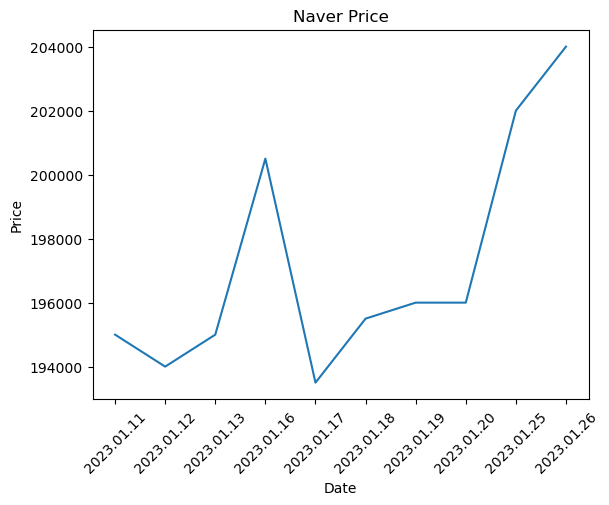

In [73]:
import matplotlib.pyplot as plt

# 그래프 결과
plt.plot(data['종가'])
plt.title('Naver Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price')

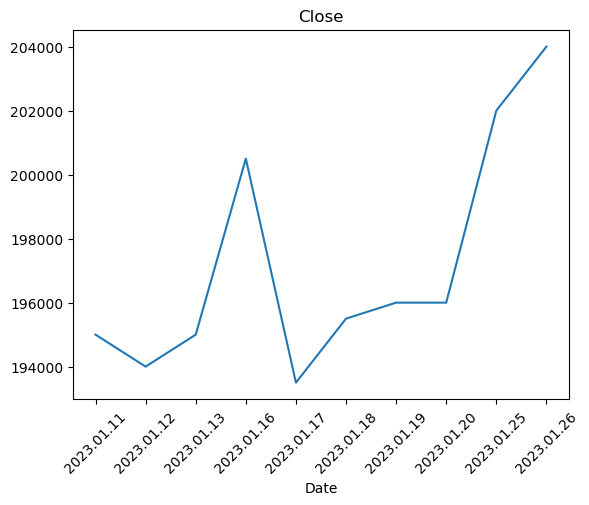

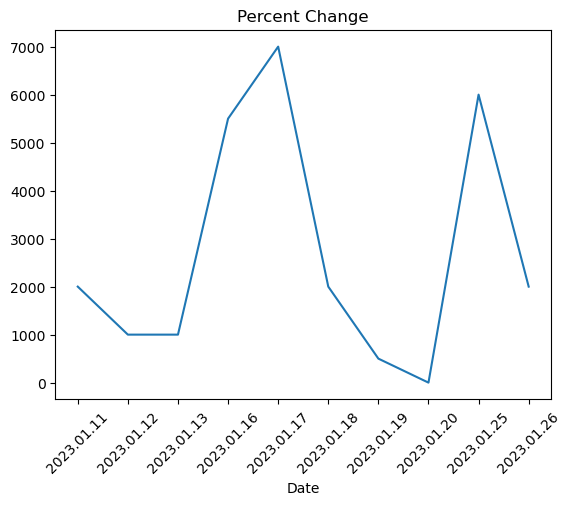

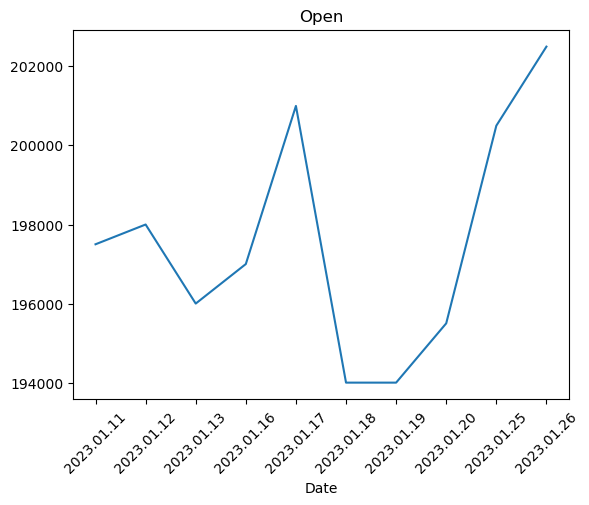

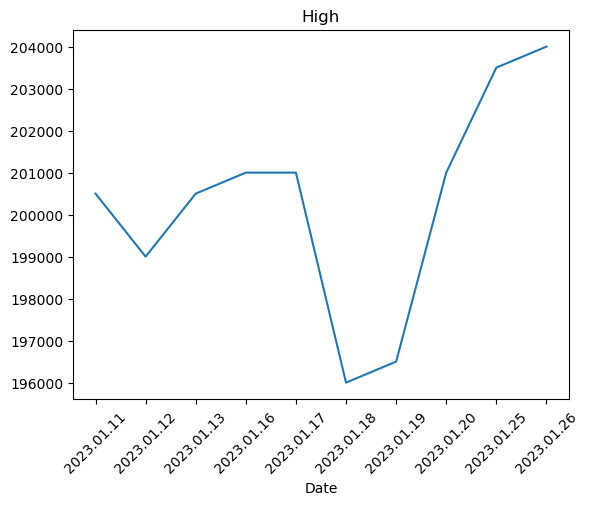

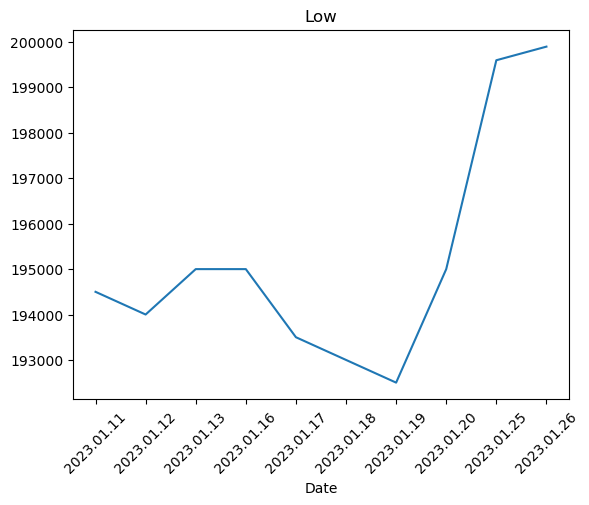

In [74]:
# 개별 이미지에 그리는 법:
Title = ['Close','Percent Change','Open','High','Low']
for title,i in enumerate(data.columns[:-1]):
    plt.plot(data[i])
    plt.title(Title[title])
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.show()

#### 내 종목 1년치 종가 데이터

Text(0, 0.5, 'Price')

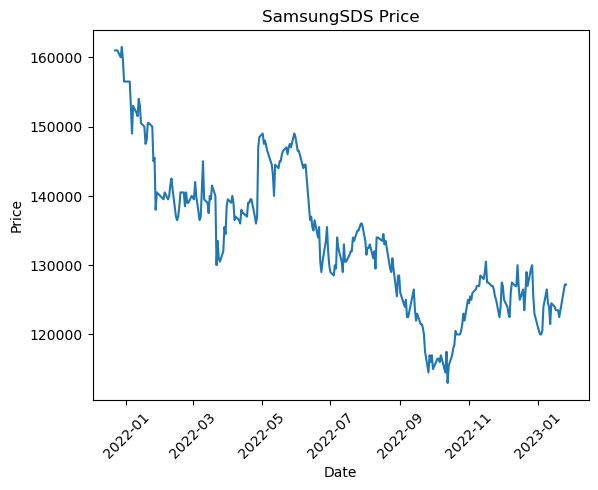

In [76]:
plt.plot(my_data['종가'])
plt.title('SamsungSDS Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price')


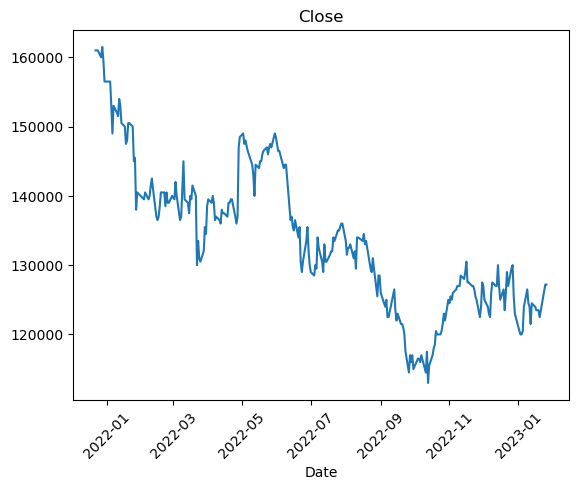

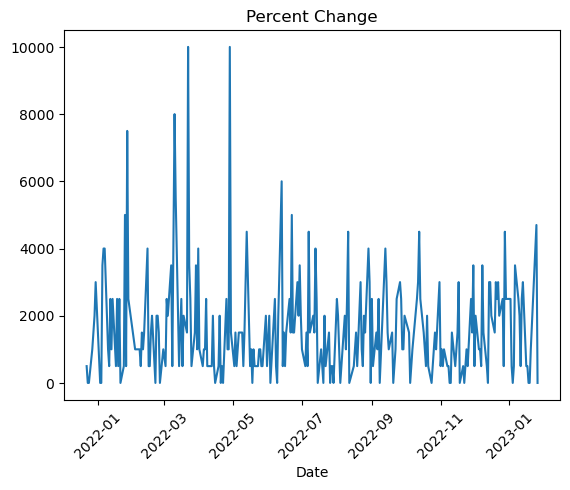

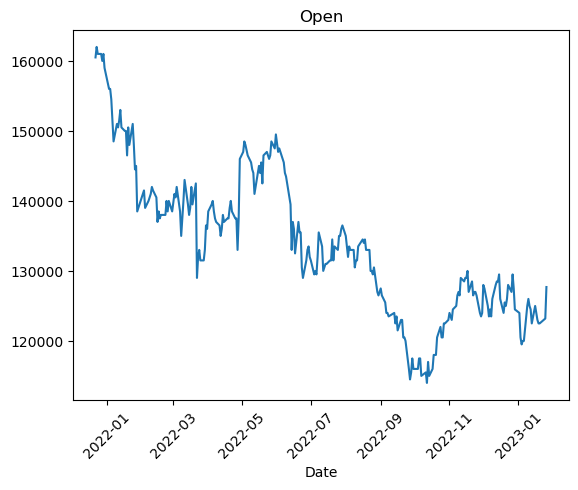

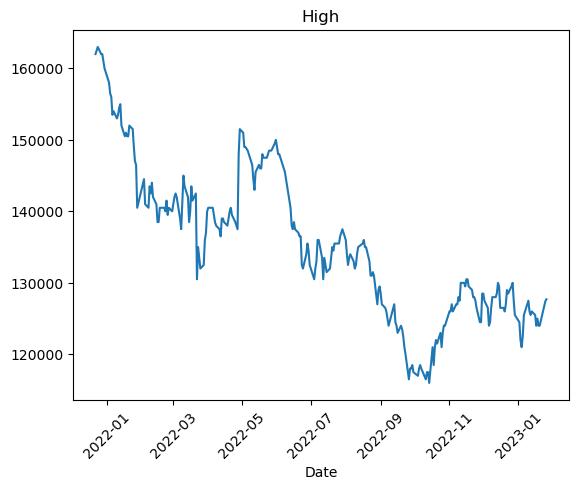

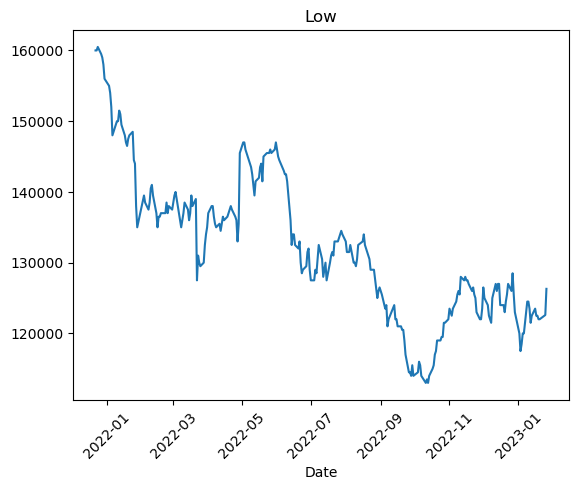

In [80]:
#다른 칼럼데이터들 시각화
Title = ['Close','Percent Change','Open','High','Low']
for title,i in enumerate(my_data.columns[:-1]):  #title이 인덱스 값, i는 column값
    plt.plot(my_data[i])
    plt.title(Title[title])
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.show()